In [2]:
pip install numpy

Epoch 0, Loss:0.35022397170506697
Epoch 4000, Loss:0.012453254657333768
Epoch 8000, Loss:0.0030211881298255945
Predictions after training:
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]
Desired:
[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]
[[-0.44503658 -2.02273297  6.98305144 -5.05312637]
 [ 5.33952867  2.9330933  -6.00542845 -4.57077344]
 [-0.29083119 -1.09948985 -6.29735617  5.95353296]]
[[-2.52820247 -0.16816195  2.56361534  1.69257892]]
[[-5.98332542]
 [-1.82304568]
 [-7.4313855 ]
 [-7.15248467]]
[[10.92011768]]


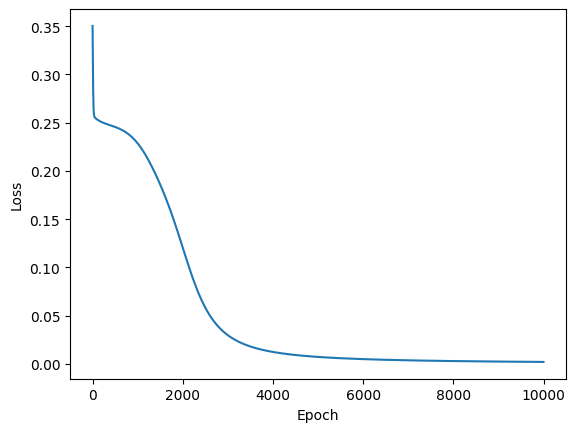

In [8]:
import numpy as np
import matplotlib.pyplot as plt
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lossvlaues = []
        # Initialize weights
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        # Initialize the biases
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Input to hidden
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        # Hidden to output
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        # Compute the output layer error
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        # Compute the hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):

        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            loss = np.mean(np.square(y - output))
            self.lossvlaues.append(loss)
            if epoch % 4000 == 0:

                print(f"Epoch {epoch}, Loss:{loss}")

X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
              [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([[0], [1], [1], [0], [1], [0], [0], [1]])

nn = NeuralNetwork(input_size=3, hidden_size=4, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

# Test the trained model
output = nn.feedforward(X)
print("Predictions after training:")
print(np.round(output,0))
print("Desired:")
print(np.round(y,0))
print(nn.weights_input_hidden)
print(nn.bias_hidden)
print(nn.weights_hidden_output)
print(nn.bias_output)

plt.plot(nn.lossvlaues)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()